In [20]:
from matplotlib.animation import FuncAnimation, PillowWriter
import matplotlib.pyplot as plt
from IPython.display import HTML
import pandas as pd
from matplotlib.patches import Polygon
from matplotlib.path import Path


In [22]:
data_df = pd.read_csv('traces.csv')
data_df.head(5)

,frame,total_frames,class,id,cx,cy
0,0,4646,car,car1,354.15,304.43
1,0,4646,car,car2,417.89,293.76
2,0,4646,car,car3,354.90,257.02
3,0,4646,car,car4,378.65,224.20
4,0,4646,car,car5,598.92,293.35


In [24]:
frame_data_df = data_df.groupby('frame')
frame_data_df.head(5)

,frame,total_frames,class,id,cx,cy
0,0,4646,car,car1,354.15,304.43
1,0,4646,car,car2,417.89,293.76
2,0,4646,car,car3,354.90,257.02
3,0,4646,car,car4,378.65,224.20
4,0,4646,car,car5,598.92,293.35
...,...,...,...,...,...,...
87239,4519,4646,bus,truck317,536.54,182.42
87240,4519,4646,truck,truck312,493.52,338.37
87241,4519,4646,car,car683,410.66,234.16
87242,4519,4646,truck,truck354,312.41,360.50


In [7]:
data_df[data_df['frame']==0]

,frame,total_frames,class,id,cx,cy
0,0,4646,car,car1,354.15,304.43
1,0,4646,car,car2,417.89,293.76
2,0,4646,car,car3,354.90,257.02
3,0,4646,car,car4,378.65,224.20
4,0,4646,car,car5,598.92,293.35
5,0,4646,motorcycle,motorcycle1,360.89,349.74
6,0,4646,car,car6,451.56,250.71
7,0,4646,truck,truck1,547.92,377.95
8,0,4646,truck,truck2,175.37,246.95
9,0,4646,truck,truck3,264.39,279.38


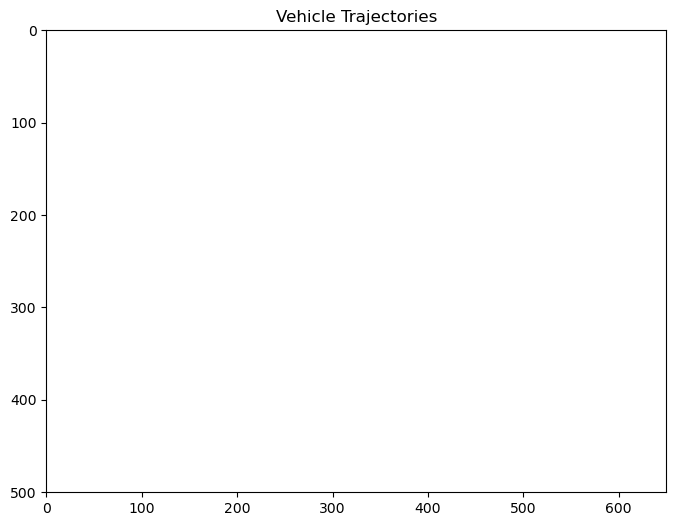

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# -----------------------
# Load your traffic data
# -----------------------
frames = sorted(data_df['frame'].unique())

# -----------------------
# Prepare plot
# -----------------------
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(0,650)
ax.set_ylim(500,0)
ax.set_title("Vehicle Trajectories")

# For storing artists (vehicle scatters + trails)
vehicle_scatters = {}
vehicle_trails = {}
vehicle_paths = {vid: ([], []) for vid in data_df['id'].unique()}

def color_select(id):
    if 'car' in id:
        return 'blue'
    elif 'motorcycle' in id:
        return 'red'
    elif 'bus' in id:
        return 'magenta'
    elif 'truck' in id:
        return 'black'
# -----------------------
# Update function
# -----------------------
def update(frame_num):
    current_data = data_df[data_df['frame'] == frame_num]
    
    for _, row in current_data.iterrows():
        vid = row['id']
        x, y = row['cx'], row['cy']

        # Update path history
        vehicle_paths[vid][0].append(x)
        vehicle_paths[vid][1].append(y)

        # Plot scatter (current position)
        if vid not in vehicle_scatters:
            vehicle_scatters[vid] = ax.plot(x, y, 'o', color = color_select(vid),label=f"Veh {vid}")[0]
        else:
            vehicle_scatters[vid].set_data(x, y)

        # Plot trail (path)
        if vid not in vehicle_trails:
            vehicle_trails[vid] = ax.plot(vehicle_paths[vid][0],
                                          vehicle_paths[vid][1],
                                          '-', linewidth=1,color = color_select(vid))[0]
        else:
            vehicle_trails[vid].set_data(vehicle_paths[vid][0],
                                         vehicle_paths[vid][1])
    
    return list(vehicle_scatters.values()) + list(vehicle_trails.values())



In [28]:
# -----------------------
# Animate
# -----------------------
ani = animation.FuncAnimation(fig, update, frames=frames,
                              interval=1000, blit=True, repeat=False)

# -----------------------
# Save as GIF (requires ImageMagick) OR MP4
# -----------------------
#ani.save("vehicle_paths.html", writer="html", fps=25)
#ani.save("vehicle_paths.mp4", writer="ffmpeg", fps=5)

#plt.show()


/var/folders/62/5kf6jq_x2m7ftwdd6cscc2880000gp/T/ipykernel_1054/2913698856.py:50: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  vehicle_scatters[vid].set_data(x, y)


In [30]:
ani.save("vehicle_paths_small.html", writer="html", fps=5)


/var/folders/62/5kf6jq_x2m7ftwdd6cscc2880000gp/T/ipykernel_1054/2913698856.py:50: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  vehicle_scatters[vid].set_data(x, y)


In [36]:
help(ani.to_jshtml)

Help on method to_jshtml in module matplotlib.animation:

to_jshtml(fps=None, embed_frames=True, default_mode=None) method of matplotlib.animation.FuncAnimation instance
    Generate HTML representation of the animation.

    Parameters
    ----------
    fps : int, optional
        Movie frame rate (per second). If not set, the frame rate from
        the animation's frame interval.
    embed_frames : bool, optional
    default_mode : str, optional
        What to do when the animation ends. Must be one of ``{'loop',
        'once', 'reflect'}``. Defaults to ``'loop'`` if the *repeat*
        parameter is True, otherwise ``'once'``.



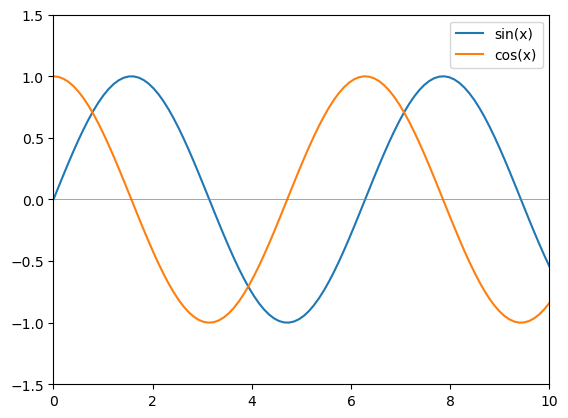

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Sample data for animation
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# Initialize figure and axis
fig, ax = plt.subplots()
line1, = ax.plot(x, y1, label='sin(x)')
line2, = ax.plot(x, y2, label='cos(x)')
ax.axhline(0, color='gray', lw=0.5)
ax.axvline(0, color='gray', lw=0.5)
ax.set_ylim(-1.5, 1.5)
ax.set_xlim(0, 10)
ax.legend()

# Variables to store line coordinates
line_coords = []

def on_click(event):
    global line_coords
    if event.inaxes is not None:
        line_coords.append((event.xdata, event.ydata))
        if len(line_coords) == 2:
            # Draw the line
            ax.plot([line_coords[0][0], line_coords[1][0]], 
                    [line_coords[0][1], line_coords[1][1]], 
                    color='red', lw=2)
            plt.draw()

# Connect the click event
fig.canvas.mpl_connect('button_press_event', on_click)

# Function to update the animation
def update(frame):
    # Update the animated lines (example)
    line1.set_ydata(np.sin(x + frame / 10.0))
    line2.set_ydata(np.cos(x + frame / 10.0))
    
    # Count crossings if the line is drawn
    if len(line_coords) == 2:
        count_crossings()

    return line1, line2

def count_crossings():
    global line_coords
    x1, y1 = line_coords[0]
    x2, y2 = line_coords[1]
    
    # Calculate the slope and intercept of the drawn line
    slope = (y2 - y1) / (x2 - x1)
    intercept = y1 - slope * x1
    
    # Check for crossings
    crossings = 0
    for line in [line1, line2]:
        y_values = line.get_ydata()
        for i in range(len(y_values) - 1):
            # Check if the line crosses the drawn line
            if (y_values[i] - (slope * x[i] + intercept)) * (y_values[i + 1] - (slope * x[i + 1] + intercept)) < 0:
                crossings += 1

    print(f"Number of crossings: {crossings}")

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=np.arange(0, 100), interval=200, blit=True)

plt.show()
